In [1]:
import pickle
import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
current_dir = %pwd
current_dir = Path(current_dir).resolve()
data_dir = current_dir.parent / 'data' 
embeddings_path = data_dir / 'synthetic' / 'synthetic_easy_1000' / 'embedded' / 'embs_ez_simi_sgd_100epochs_2d.pkl'
labels_path = data_dir / 'synthetic' / 'synthetic_easy_1000' / 'labels.pkl'

#embeddings_path = data_dir / 'yelpnyc' / 'embedded' / 'lightgcn' / 'embs_bpr_100epochs_2d.pkl'
#labels_path = data_dir / 'yelpnyc' / 'yelpnyc_labels.pkl'

In [3]:
def load_user_embeddings(file: Path):
    """
    Loads user embeddings from a pickle file. The pickle file should contain a 2D numpy array or a torch tensor
    with shape (users, features), where each row represents the embedding of a user.

    Args:
    file_name: A string representing the file path of the pickle file.

    Returns:
    A numpy array of user embeddings.
    """
    with open(file, "rb") as file:
        loaded_object = pickle.load(file)
        if isinstance(loaded_object, torch.Tensor):
            loaded_object = loaded_object.detach().numpy()
    return loaded_object

In [4]:
embeddings = load_user_embeddings(embeddings_path)
labels = np.load(labels_path, allow_pickle=True)
users, features = np.shape(embeddings)
print(f'Users: {users}')
print(f'Features: {features}')

Users: 160225
Features: 2


In [5]:
if features > 2:
    print("Reduced dimensionality with TSNE")
    tsne = TSNE(n_components=2)
    embeddings = TSNE.fit_transform(embeddings)

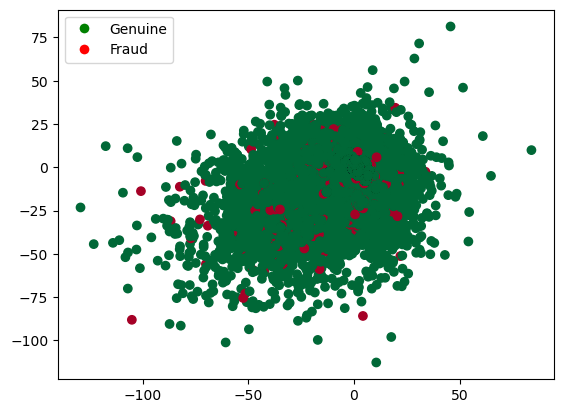

In [6]:
mask = labels == 0

# plot the embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=mask, cmap='RdYlGn')

# Add legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=8),
                        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8)],
               labels=['Genuine', 'Fraud'])

plt.show()